In [1]:
## 수정이 되는지 한번 보자

In [35]:
PATH="C:\\Users\\98gud\\Desktop\\paper\\open\\"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import torch
import category_encoders as ce

from torch.utils.data import DataLoader
import torch.nn as nn

In [36]:
train=pd.read_csv(PATH+"train.csv")
original=pd.read_csv(PATH+"train.csv")
test=pd.read_csv(PATH+"test.csv")
sample_submission=pd.read_csv(PATH+"sample_submission.csv")

In [37]:
display(train.head())

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
train.dtypes

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
dtype: object

In [5]:
print(original.columns)
print(test.columns)

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')
Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month'],
      dtype='object')


In [38]:
train.drop(train[['family_type','edu_type']],axis=1,inplace=True)

In [39]:
test.drop(test[['family_type','edu_type']],axis=1,inplace=True)

## 명목형 변수 인코딩

In [40]:
## 이진 변수와 멀티 클래스 변수로 구분
bi_cate=['gender','car','reality']
multi_cate=[x for x in train.select_dtypes(exclude=np.number) if x not in bi_cate]
del multi_cate[-1]

In [41]:
## 이진 변수와 멀티 클래스 변수로 구분
bi_cate=['gender','car','reality']
multi_cate=[x for x in test.select_dtypes(exclude=np.number) if x not in bi_cate]
del multi_cate[-1]

In [79]:
multi_cate

['income_type', 'house_type']

In [42]:
one_en=ce.one_hot.OneHotEncoder(handle_missing="value")
train_bi=one_en.fit_transform(train[bi_cate])

C:\Users\98gud\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [43]:
one_en=ce.one_hot.OneHotEncoder(handle_missing="value")
test_bi=one_en.fit_transform(test[bi_cate])

C:\Users\98gud\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [44]:
train[bi_cate]=train_bi[[x+"_1" for x in bi_cate]]

In [45]:
test[bi_cate]=test_bi[[x+"_1" for x in bi_cate]]

In [14]:
train

,index,gender,car,reality,child_num,income_total,income_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,1,1,1,0,202500.0,Commercial associate,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,1,1,0,1,247500.0,Commercial associate,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,0,0,0,0,450000.0,Working,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,1,1,0,0,202500.0,Commercial associate,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,1,0,0,0,157500.0,State servant,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,1,1,1,2,225000.0,State servant,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,1,1,0,1,180000.0,Working,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,1,0,1,0,292500.0,Working,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,0,1,0,0,171000.0,Working,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [14]:
# one_en=ce.one_hot.OneHotEncoder(handle_missing="value")
# train_multi=one_en.fit_transform(train[multi_cate])

# one_en=ce.one_hot.OneHotEncoder(handle_missing="value")
# test_multi=one_en.fit_transform(test[multi_cate])

# train.drop(train[multi_cate],axis=1,inplace=True)
# train[train_multi.columns]=train_multi

# test.drop(test[multi_cate],axis=1,inplace=True)
# test[test_multi.columns]=test_multi

C:\Users\98gud\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [18]:
train['house_type'].unique()

array(['Municipal apartment', 'House / apartment', 'With parents',
       'Co-op apartment', 'Rented apartment', 'Office apartment'],
      dtype=object)

In [46]:
train.replace({'income_type':'Student'},{'income_type':1},inplace=True)
train.replace({'house_type':'Rented apartment'},{'house_type':1},inplace=True)

train.loc[train['income_type']!=1,['income_type']]=0
train.loc[train['house_type']!=1,['house_type']]=0

train[['income_type','house_type']]=train[['income_type','house_type']].astype(float)

test.replace({'income_type':'Student'},{'income_type':1},inplace=True)
test.replace({'house_type':'Rebted apartment'},{'house_type':1},inplace=True)

test.loc[test['income_type']!=1,['income_type']]=0
test.loc[test['house_type']!=1,['house_type']]=0

test[['income_type','house_type']]=test[['income_type','house_type']].astype(float)

In [20]:
## 자 이제 하이라이트인 occupy는 어떻게 할 것인가? 일단 변수가 미치는 영향부터 보도록 하자


pd.crosstab(index=train['occyp_type'], columns=train['credit']).apply(lambda r: r/r.sum(), axis=1)

credit,0.0,1.0,2.0
occyp_type,,,
Accountants,0.130820,0.251663,0.617517
Cleaning staff,0.099256,0.230769,0.669975
Cooking staff,0.126915,0.240700,0.632385
Core staff,0.131141,0.235072,0.633787
Drivers,0.118730,0.227302,0.653968
HR staff,0.112903,0.064516,0.822581
High skill tech staff,0.118269,0.259615,0.622115
IT staff,0.195122,0.243902,0.560976
Laborers,0.129876,0.239805,0.630319


<BarContainer object of 18 artists>

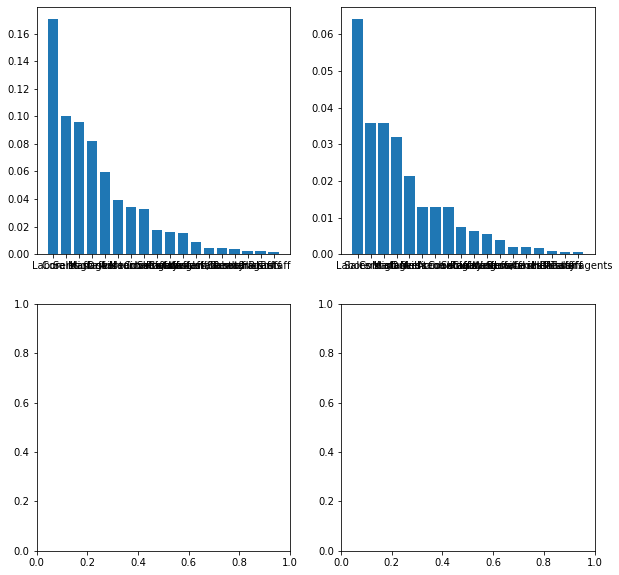

In [21]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
axes[0][0].bar(train['occyp_type'].value_counts().index,train['occyp_type'].value_counts()/train.shape[0])
axes[0][1].bar(test['occyp_type'].value_counts().index,test['occyp_type'].value_counts()/train.shape[0])

In [47]:
train.replace({'occyp_type':'HR staff'},{'occyp_type':1},inplace=True)
train.replace({'occyp_type':'IT staff'},{'occyp_type':-2},inplace=True)
train.replace({'occyp_type':'Waiters/barmen staff'},{'occyp_type':-1},inplace=True)


train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries', 1, -2,
       'Low-skill Laborers', -1], dtype=object)

In [48]:
test.replace({'occyp_type':'HR staff'},{'occyp_type':1},inplace=True)
test.replace({'occyp_type':'IT staff'},{'occyp_type':-2},inplace=True)
test.replace({'occyp_type':'Waiters/barmen staff'},{'occyp_type':-1},inplace=True)

test['occyp_type'].unique()

array([nan, 'Core staff', 'Laborers', 'Drivers', 'Managers',
       'Sales staff', 'Cleaning staff', 'Accountants', 'Cooking staff',
       'Medicine staff', 'Realty agents', -1, 'Private service staff',
       'High skill tech staff', 'Low-skill Laborers', 'Security staff',
       'Secretaries', 1, -2], dtype=object)

In [49]:
occupation_miss=np.zeros(train.shape[0])
miss_index=train.loc[train['occyp_type'].isna()].index
occupation_miss[miss_index]=1
train['occyp_miss']=occupation_miss                 


In [50]:
occupation_miss=np.zeros(test.shape[0])
miss_index=test.loc[test['occyp_type'].isna()].index
occupation_miss[miss_index]=1
test['occyp_miss']=occupation_miss                 

In [51]:
train.loc[(train['occyp_type']!=1) &( train['occyp_type']!=-1) & (train['occyp_type']!=-2) ,['occyp_type']]=0

In [52]:
test.loc[(test['occyp_type']!=1) &( test['occyp_type']!=-1) & (test['occyp_type']!=-2) ,['occyp_type']]=0

In [53]:
## EDA를 통해서 FLAG_MOBIL이 1의 값만 있다는 사실을 알았으므로 제거

train.drop(train[['FLAG_MOBIL']],axis=1,inplace=True)
train.drop(train[['credit']],axis=1,inplace=True)
train.drop(train[['index']],axis=1,inplace=True)

In [54]:
## EDA를 통해서 FLAG_MOBIL이 1의 값만 있다는 사실을 알았으므로 제거

test.drop(test[['FLAG_MOBIL']],axis=1,inplace=True)
test.drop(test[['index']],axis=1,inplace=True)

In [93]:
#train

In [20]:
## 효율적인 변수 이용을 위한 변수 선택

from sklearn.decomposition import PCA

pca=PCA(n_components=5)
train_pca=pd.DataFrame(pca.fit_transform(train))
pca=PCA(n_components=5)
test_pca=pd.DataFrame(pca.fit_transform(test))

In [21]:
train[['occyp_type']]=train[['occyp_type']].astype(float)
test[['occyp_type']]=test[['occyp_type']].astype(float)

## 만약에 딥러닝 아니고 그냥 머신러닝이면?

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

train_y=original[['credit']]
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 1022)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")



Train set: 
(19842, 5)
(19842, 1)
Validation set: 
(6615, 5)
(6615, 1)
log_loss: 0.8870208727694147


In [97]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_pca, train_y)):
        X_train, X_val = train_pca.iloc[train_index], train_pca.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_pca)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

FOLD 0 : logloss:0.8576050391376447
FOLD 1 : logloss:0.8596726715479509
FOLD 2 : logloss:0.8569760762503464
FOLD 3 : logloss:0.8729313227644512
FOLD 4 : logloss:0.8713671701977791
Mean:0.8637104559796344


In [53]:
my_submission

array([[0.05      , 0.26139048, 0.68860952],
       [0.092     , 0.1918    , 0.7162    ],
       [0.03525   , 0.074     , 0.89075   ],
       ...,
       [0.079     , 0.07933333, 0.84166667],
       [0.176     , 0.21812222, 0.60587778],
       [0.09      , 0.22983333, 0.68016667]])

In [54]:
sample_submission.iloc[:, 1:]=my_submission

In [55]:
sample_submission.to_csv("C:\\Users\\98gud\\Desktop\\paper\\rimline.csv",index=False)

In [98]:
from pycaret.classification import *
from sklearn.metrics import log_loss

train['credit']=train_y['credit']

clf = setup(train, target = 'credit', train_size = 0.85)
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")


,Description,Value
0,session_id,4914
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 17)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='credit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function               <function log_loss at 0x000001838339FDC0>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [99]:
best5 = compare_models(fold = 5, sort = 'logloss', n_select = 5, exclude=['svm','ridge'])

blended = blend_models(estimator_list = best5, fold = 5, optimize = 'logloss')
pred_holdout = predict_model(blended)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6945,0.6591,0.4081,0.6300,0.6060,0.2078,0.3143,0.8153
1,0.6883,0.6712,0.3994,0.6250,0.5957,0.1854,0.2936,0.8175
2,0.6901,0.6477,0.4023,0.6264,0.5990,0.1923,0.2993,0.8184
3,0.6931,0.6706,0.4060,0.6242,0.6038,0.2041,0.3082,0.8115
4,0.6947,0.6900,0.4084,0.6238,0.6065,0.2105,0.3128,0.8098
Mean,0.6921,0.6677,0.4048,0.6259,0.6022,0.2000,0.3056,0.8145
SD,0.0025,0.0141,0.0035,0.0022,0.0042,0.0096,0.0080,0.0033


INFO:logs:create_model_container: 12
INFO:logs:master_model_container: 12
INFO:logs:display_container: 3
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=4914, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Voting Classifier,0.6866,0,0.4018,0.6056,0.5939,0.1914,0.2917,0


In [100]:
custom_model = compare_models(fold = 5, sort = 'logloss', n_select = 6, include=['lightgbm','gbc','rf','ada', 'lda', 'nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6978,0.7081,0.4256,0.6858,0.6217,0.2377,0.3186,0.7633,0.1440
gbc,Gradient Boosting Classifier,0.6935,0.6554,0.4115,0.6711,0.6089,0.2142,0.3058,0.7942,1.1620
lda,Linear Discriminant Analysis,0.6424,0.6091,0.3367,0.5229,0.5083,0.0101,0.0422,0.8614,0.0480
nb,Naive Bayes,0.6426,0.6069,0.3347,0.5245,0.5040,0.0046,0.0348,0.8639,0.0800
rf,Random Forest Classifier,0.6993,0.7437,0.5256,0.6742,0.6787,0.3588,0.3680,0.9160,0.3500
ada,Ada Boost Classifier,0.6921,0.6225,0.4057,0.6479,0.6031,0.2019,0.3045,1.0808,0.1940


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4914, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0

In [101]:
blended_custom = blend_models(estimator_list = custom_model, fold = 5, optimize = 'logloss')
pred_holdout_custom = predict_model(blended_custom)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6972,0.7326,0.4147,0.6553,0.6131,0.2238,0.3194,0.7862
1,0.6901,0.7374,0.4042,0.6619,0.6010,0.1964,0.2970,0.7888
2,0.6925,0.7294,0.4085,0.6232,0.6058,0.2065,0.3043,0.7893
3,0.6987,0.7268,0.4158,0.6878,0.6145,0.2267,0.3246,0.7886
4,0.6994,0.7450,0.4165,0.6251,0.6155,0.2304,0.3260,0.7849
Mean,0.6956,0.7343,0.4119,0.6507,0.6100,0.2168,0.3143,0.7876
SD,0.0036,0.0064,0.0048,0.0242,0.0056,0.0130,0.0115,0.0017


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=4914, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Voting Classifier,0.6904,0.7356,0.4123,0.7335,0.6044,0.2114,0.3020,0.7915


In [64]:
final_model = finalize_model(blended)

#Accurary, AUC, Logloss 셋다 상위 4개인 모델 
final_model_custom = finalize_model(blended_custom)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=5803, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                 

INFO:logs:create_model() succesfully completed......................................
INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=580

INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Voting Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                         

In [65]:
prep_pipe = get_config("prep_pipe")
prep_pipe.steps.append(['trained_model', final_model_custom])
prections = prep_pipe.predict_proba(test)
prections

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=prep_pipe)
INFO:logs:Global variable: prep_pipe returned as Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='credit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
           

array([[0.16883855, 0.1782596 , 0.65290186],
       [0.16932051, 0.20308798, 0.62759151],
       [0.16158728, 0.17989923, 0.65851348],
       ...,
       [0.14360513, 0.16391562, 0.69247925],
       [0.16174965, 0.22242798, 0.61582237],
       [0.19911494, 0.27132044, 0.52956462]])

In [66]:
type(prections)

numpy.ndarray

In [67]:
prections[:,0]

array([0.16883855, 0.16932051, 0.16158728, ..., 0.14360513, 0.16174965,
       0.19911494])

In [68]:
sample_submission

,index,0,1,2
0,26457,0.050000,0.261390,0.688610
1,26458,0.092000,0.191800,0.716200
2,26459,0.035250,0.074000,0.890750
3,26460,0.057867,0.312633,0.629500
4,26461,0.136700,0.288033,0.575267
...,...,...,...,...
9995,36452,0.095500,0.126000,0.778500
9996,36453,0.129833,0.291962,0.578205
9997,36454,0.079000,0.079333,0.841667
9998,36455,0.176000,0.218122,0.605878


In [69]:
sample_submission['0']=prections[:,0]
sample_submission['1']=prections[:,1]
sample_submission['2']=prections[:,2]

In [70]:
sample_submission.to_csv("C:\\Users\\98gud\\Desktop\\paper\\pycaret.csv",index=False)

<AxesSubplot:>

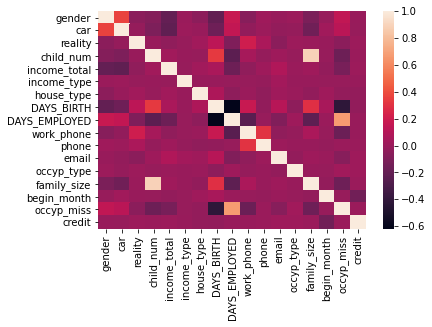

In [102]:
sns.heatmap(train.corr())

In [57]:
from sklearn.model_selection import StratifiedKFold

train['credit']=original['credit']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in skf.split(train, train['credit']):
    folds.append((train_idx, valid_idx))

In [58]:
import random
from lightgbm import LGBMClassifier

random.seed(42)
lgb_models={}
for fold in range(5):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = train.drop(['credit'],axis=1).iloc[train_idx].values, train.drop(['credit'],axis=1).iloc[valid_idx].values,\
                                         train['credit'][train_idx].values, train['credit'][valid_idx].values 
    lgb = LGBMClassifier(n_estimators=1000)
    lgb.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], 
            early_stopping_rounds=30,
           verbose=100)
    lgb_models[fold]=lgb
    print(f'================================================================================\n\n')

====================================1============================================
Training until validation scores don't improve for 30 rounds
[100]	training's multi_logloss: 0.660861	valid_1's multi_logloss: 0.75569
[200]	training's multi_logloss: 0.577205	valid_1's multi_logloss: 0.739575
[300]	training's multi_logloss: 0.517792	valid_1's multi_logloss: 0.735401
[400]	training's multi_logloss: 0.468766	valid_1's multi_logloss: 0.733153
Early stopping, best iteration is:
[387]	training's multi_logloss: 0.474261	valid_1's multi_logloss: 0.732777


====================================2============================================
Training until validation scores don't improve for 30 rounds
[100]	training's multi_logloss: 0.65824	valid_1's multi_logloss: 0.7719
[200]	training's multi_logloss: 0.574158	valid_1's multi_logloss: 0.761589
[300]	training's multi_logloss: 0.510575	valid_1's multi_logloss: 0.758779
Early stopping, best iteration is:
[287]	training's multi_logloss: 0.518552	valid

In [69]:
sample_submission.iloc[:,1:]=0
for fold in range(5):
    sample_submission.iloc[:,1:] += lgb_models[fold].predict_proba(test)/5

In [70]:
sample_submission.to_csv(PATH+"lgbm.csv", index=False) # 0.7272812144

In [71]:
sample_submission

,index,0,1,2
0,26457,0.122655,0.099684,0.777660
1,26458,0.121570,0.150693,0.727737
2,26459,0.034178,0.108517,0.857305
3,26460,0.114643,0.138160,0.747197
4,26461,0.108784,0.145343,0.745873
...,...,...,...,...
9995,36452,0.092104,0.156441,0.751455
9996,36453,0.103314,0.233671,0.663015
9997,36454,0.036391,0.053168,0.910441
9998,36455,0.097378,0.190410,0.712212
